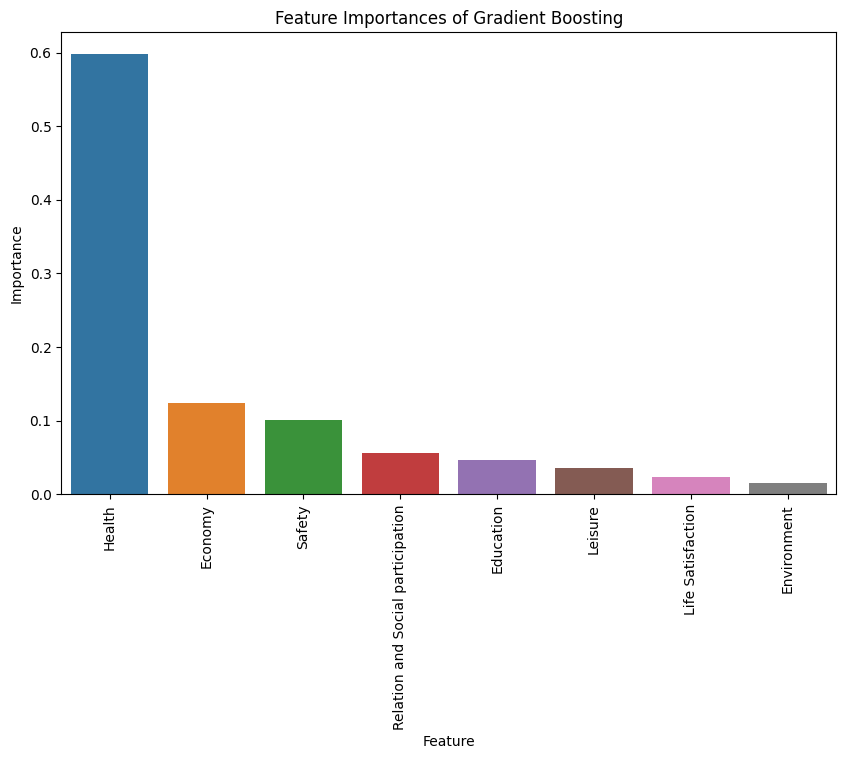

In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_excel('happiness_korea.xlsx')
df = df.dropna()

# 특성과 타겟 분리
features = ['Economy', 'Health', 'Safety', 'Environment', 'Education', 
            'Relation and Social participation', 'Leisure','Life Satisfaction']
target = 'Happiness'
X = df[features]
y = df[target]

# 모델 학습
model = GradientBoostingRegressor()
model.fit(X, y)

# 특성 중요도 가져오기
feature_importances = model.feature_importances_

# 특성 중요도 데이터 프레임 생성
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances of Gradient Boosting')
plt.xticks(rotation=90)  # x축 레이블을 90도 회전하여 가독성 향상
plt.show()

In [3]:
# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측 생성
y_pred = model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0006267138768887064
